In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

**Step 1**

Read the file train.csv into Python and print a few rows.

In [2]:
df_Train = pd.read_csv('train.csv')
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_Train.info()  #get info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Step 2**

Omit unuseful data (Cabin)

Plot pairplots and corr matrix

In [4]:
df_Train.drop(['Cabin','Name', 'Ticket', 'PassengerId'], axis=1, inplace=True) 

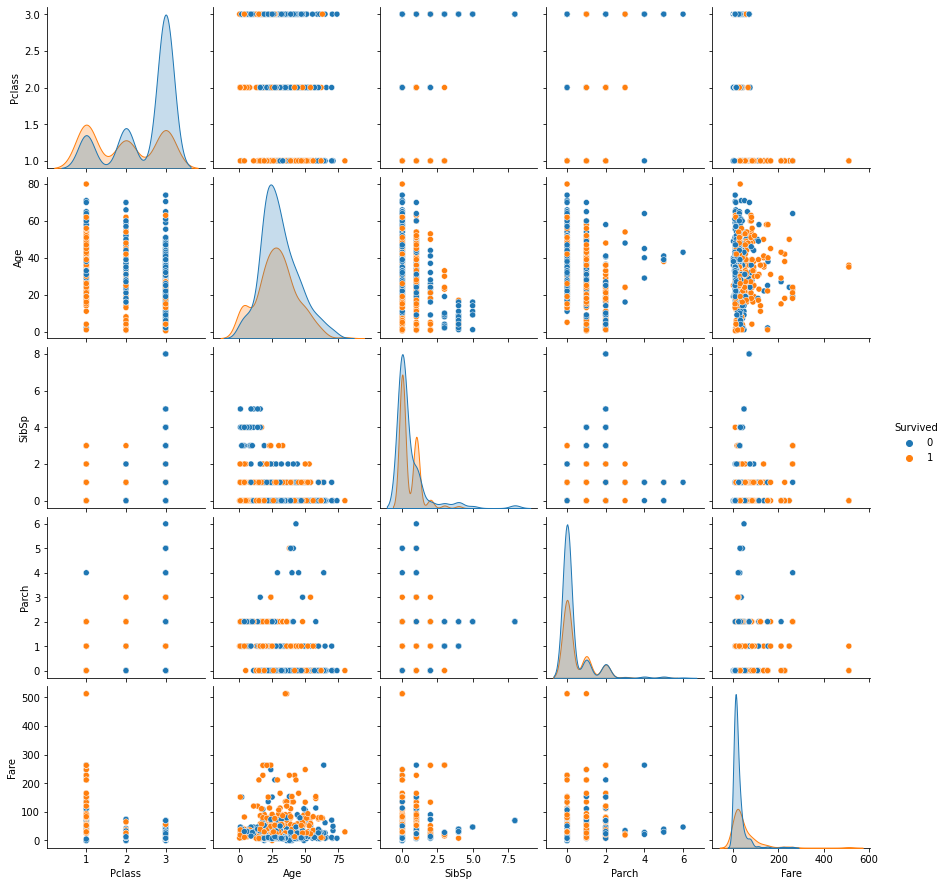

In [5]:
# check the correlation of numerical values
sns.pairplot(data=df_Train, hue='Survived')

**Step 3**

Split Data

In [6]:
y=df_Train['Survived']
X=pd.DataFrame(df_Train.drop('Survived', axis=1))
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [8]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,623.000000,504.000000,623.000000,623.000000,623.000000
mean,2.319422,30.045476,0.457464,0.377207,30.874003
std,0.830909,14.502377,0.964501,0.841409,47.760418
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,29.000000,0.000000,0.000000,13.500000
75%,3.000000,39.000000,1.000000,0.000000,30.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    object 
 2   Age       504 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  621 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 38.9+ KB


**Step 4**

visualize the missing values

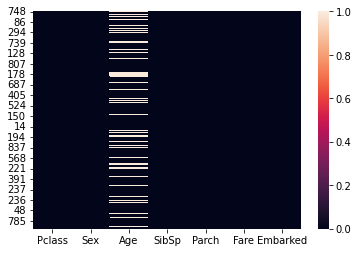

In [10]:
sns.heatmap(X_train.isna())

check for correlation, but loose the non numerical values

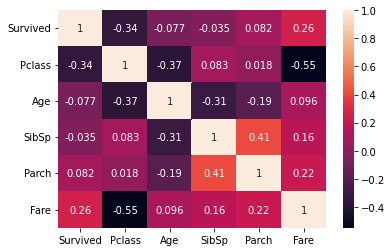

In [11]:
sns.heatmap((df_Train.drop(['Sex','Embarked'], axis=1)).corr(), annot=True)

In [12]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
748,1,male,19.0,1,0,53.1000,S
45,3,male,NaN,0,0,8.0500,S
28,3,female,NaN,0,0,7.8792,Q
633,1,male,NaN,0,0,0.0000,S
403,3,male,28.0,1,0,15.8500,S


# **Preprcosseing**


---
1. make lists, one for of columns with numeric values and one for columns with categorial values


In [13]:
numeric_feature_fare = ['Fare']
numeric_feature_age = ['Age']
categorical_int_features=['SibSp', 'Parch']
categorical_features = ['Embarked', 'Sex', 'Pclass']

2. Build transformers

In [14]:
numeric_transformer_fare = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(2), RobustScaler())
categorial_transformer=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse=False, handle_unknown='ignore'))
categorical_int_transformer=SimpleImputer(strategy='most_frequent') 
age_categorizer_transformer= make_pipeline(SimpleImputer(strategy='mean'),KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform'))

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_fare', numeric_transformer_fare, numeric_feature_fare),
        ('cat', categorial_transformer, categorical_features),
        ('cat_int', categorical_int_transformer,categorical_int_features),
        ('age_cat',age_categorizer_transformer,numeric_feature_age)
    ],
    remainder='passthrough')

**Test:**

---





> apply preprocessor on data and train model on them



> use pipeline to transform data and train 



> compare accruracies







In [16]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_fare',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                

In [17]:
X_train2=pd.DataFrame(preprocessor.transform(X_train))
X_train2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.791515,3.148499,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,-0.246559,-0.140210,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,-0.254287,-0.143458,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,-0.610744,-0.217571,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.106315,0.082340,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       623 non-null    float64
 1   1       623 non-null    float64
 2   2       623 non-null    float64
 3   3       623 non-null    float64
 4   4       623 non-null    float64
 5   5       623 non-null    float64
 6   6       623 non-null    float64
 7   7       623 non-null    float64
 8   8       623 non-null    float64
 9   9       623 non-null    float64
 10  10      623 non-null    float64
 11  11      623 non-null    float64
 12  12      623 non-null    float64
 13  13      623 non-null    float64
 14  14      623 non-null    float64
 15  15      623 non-null    float64
 16  16      623 non-null    float64
 17  17      623 non-null    float64
dtypes: float64(18)
memory usage: 87.7 KB


In [19]:
X_train2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,623.0,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.0,0.786005,3.639142,0.199037,0.085072,0.715891,0.348315,0.651685,0.235955,0.208668,0.555377,0.457464,0.377207,0.101124,0.582665,0.224719,0.075441,0.016051
std,0.0,2.160694,19.855676,0.399597,0.279213,0.451351,0.476819,0.476819,0.424935,0.406683,0.497323,0.964501,0.841409,0.301735,0.493515,0.417733,0.264314,0.125774
min,0.0,-0.610744,-0.217571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,-0.253536,-0.143145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.0,0.746464,0.856855,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.0,22.567168,313.134332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X_test2=pd.DataFrame(preprocessor.transform(X_test))
X_test2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.851458,1.029520,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,-0.253536,-0.143145,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,-0.260132,-0.145868,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,-0.295193,-0.159492,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,-0.246559,-0.140210,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Run Logistic regression model**


---



In [21]:
model = LogisticRegression(max_iter=1000) #initialize the model
model.fit(X_train2, y_train)

# print trainin set accuracy
train_acc = round(model.score(X_train2, y_train) * 100, 2)
print("Prediction accuracy (Training Set):", train_acc, "%\n")

# Check and print prediction accuracy and model parameters
test_acc=round(model.score(X_test2, y_test) * 100,2)
print("Prediction accuracy (Test Set):", test_acc, "%\n")


Prediction accuracy (Training Set): 80.58 %

Prediction accuracy (Test Set): 80.6 %



**Use pipeline and train Logistic regression**


---



In [22]:
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)

# print trainin set accuracy
train_acc = round(pipeline.score(X_train, y_train) * 100, 2)
print("Prediction accuracy (Training Set):", train_acc, "%\n")

# Check and print prediction accuracy and model parameters
test_acc=round(pipeline.score(X_test, y_test) * 100,2)
print("Prediction accuracy (Test Set):", test_acc, "%\n")

# Metrics AUC
y_pred_prob = pipeline.predict_proba(X_test)[:,1]
print("AUC (Test Set):", round(roc_auc_score(y_test, y_pred_prob) *100,2), "%\n")

Prediction accuracy (Training Set): 80.58 %

Prediction accuracy (Test Set): 80.6 %

AUC (Test Set): 85.23 %



**Use pipeline and train Random forest tree**


---



In [23]:
pipeline_rft = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=1000, max_depth=5))    #Hyperparam: n_estimators(number of trees)
pipeline_rft.fit(X_train, y_train)

# print trainin set accuracy
train_acc = round(pipeline_rft.score(X_train, y_train) * 100, 2)
print("Prediction accuracy (Training Set):", train_acc, "%\n")

# Check and print prediction accuracy and model parameters
test_acc=round(pipeline_rft.score(X_test, y_test) * 100, 2)
print("Prediction accuracy (Test Set):", test_acc, "%\n")

# Metrics AUC
y_pred_prob = pipeline_rft.predict_proba(X_test)[:,1]
print("AUC (Test Set):", round(roc_auc_score(y_test, y_pred_prob) *100,2), "%\n")

Prediction accuracy (Training Set): 85.39 %

Prediction accuracy (Test Set): 80.97 %

AUC (Test Set): 85.8 %



**Use pipeline and train K-Nearest Neighbor(KNN)**


1.   Calculate distance
2.   Find closest neighbors
3.   Vote for labels



---


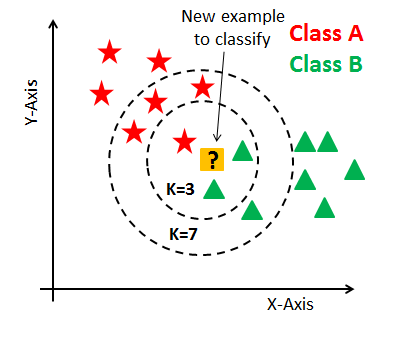


In [24]:
pipeline_knn = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=10))   
pipeline_knn.fit(X_train, y_train)

# print trainin set accuracy
train_acc = round(pipeline_knn.score(X_train, y_train) * 100, 2)
print("Prediction accuracy (Training Set):", train_acc, "%\n")

# Check and print prediction accuracy and model parameters
test_acc=round(pipeline_knn.score(X_test, y_test) * 100, 2)
print("Prediction accuracy (Test Set):", test_acc, "%\n")

# Metrics AUC
y_pred_prob = pipeline_knn.predict_proba(X_test)[:,1]
print("AUC (Test Set):", round(roc_auc_score(y_test, y_pred_prob) *100,2), "%\n")

Prediction accuracy (Training Set): 82.18 %

Prediction accuracy (Test Set): 80.22 %

AUC (Test Set): 85.08 %



# **Evaluate test.csv file** *

preprocess data

In [25]:
df_Test = pd.read_csv('test.csv')
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df_Test2 = df_Test.drop(['Cabin','Name', 'Ticket', 'PassengerId'], axis=1) 
df_Test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


see the dataframe of test data after transformation

In [27]:
# For demosntration purpose
X_test3=pd.DataFrame(preprocessor.transform(df_Test2))
X_test3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,-0.256549,-0.144395,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,-0.294062,-0.159075,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,-0.172479,-0.105535,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.218850,-0.127989,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,-0.054854,-0.037327,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


**Predict by Logistic Regression**

In [28]:
# predictions of logistic reg model on test set
test_pred_log_reg=pipeline.predict(df_Test2)
test_pred_log_reg

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
# predictions of logistic reg model on test set csv 
pred_log_reg=df_Test[['PassengerId']]
pred_log_reg['Survived'] =test_pred_log_reg
pred_log_reg.to_csv('predictions_log_reg.csv',index=False)
pred_log_reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


**Predict by Random forest model**

In [30]:
# predictions of random forest model on test set
test_pred_rnd_forest=pipeline_rft.predict(df_Test2)
test_pred_rnd_forest

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
# predictions of random forest model on test set csv 
pred_rand_forest=df_Test[['PassengerId']]
pred_rand_forest['Survived'] =test_pred_rnd_forest
pred_rand_forest.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [32]:
pred_rand_forest.to_csv('predictions_rnd_forest.csv', index=False)

In [33]:
pred_rand_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


**Predict by K-Nearest Neighbor(KNN)**

In [34]:
# predictions of logistic reg model on test set
test_pred_knn=pipeline.predict(df_Test2)
test_pred_knn

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [35]:
# predictions of random forest model on test set csv 
pred_rand_knn=df_Test[['PassengerId']]
pred_rand_knn['Survived'] =test_pred_knn
pred_rand_knn.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [36]:
pred_rand_knn.to_csv('predictions_knn.csv', index=False)

In [37]:
all_predications=df_Test[['PassengerId']]
all_predications['Survived_LogReg'] =test_pred_log_reg
all_predications['Survived_RndForest'] =test_pred_rnd_forest
all_predications['Survived_KNN'] =test_pred_knn
all_predications.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PassengerId,Survived_LogReg,Survived_RndForest,Survived_KNN
0,892,0,0,0
1,893,0,0,0
2,894,0,0,0
3,895,0,0,0
4,896,0,0,0


[(0.0, 310.0), Text(0.5, 1.0, 'KNN')]

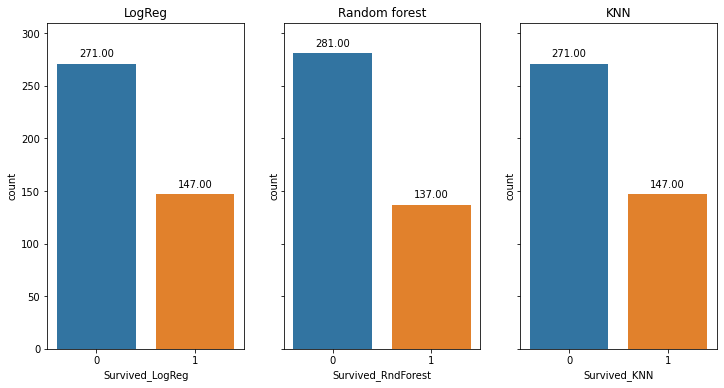

In [44]:
fig, (ax0,ax1,ax2) =plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,6))

splot = sns.countplot(data=all_predications, x = 'Survived_LogReg', ax=ax0)
for p in splot.patches:
 splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax0.set(title='LogReg', ylim=(0,310))


splot = sns.countplot(data=all_predications, x = 'Survived_RndForest', ax=ax1)
for p in splot.patches:
 splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set(title='Random forest', ylim=(0,310))


splot = sns.countplot(data=all_predications, x = 'Survived_KNN', ax=ax2)
for p in splot.patches:
 splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set(title='KNN', ylim=(0,310))

**Kaggle accuracy test:**

*   Log Reg: 0.76
*   Random forest: 0.78
*   KNN: 0.76


